In [2]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

(weight download)[https://drive.google.com/drive/folders/1ksarh-cJf3F5eKJjLVWY0X1j1qsQqiS2]

In [3]:
# 加载模型权重
model_weight = torch.load("pretrained_vctk.pth", map_location=torch.device('cpu'))

In [4]:
for key in model_weight['model'].keys():
    if key.split('.')[0] == 'emb_g':
        print(key)

emb_g.weight


In [5]:
# 或者 speaker embedding 层
embedding_weight = model_weight['model']['emb_g.weight']
print(embedding_weight.size())

torch.Size([109, 256])


In [6]:
# 处理成 sklearn 能够处理的数据
embedding_weight_np = embedding_weight.detach().numpy()
embedding_weight_np_t = embedding_weight_np.transpose()
print(embedding_weight_np_t.shape)

(256, 109)


In [7]:
# 进行 tSNE 计算
tsne = TSNE(n_components=2, random_state=0)
reduced_data = tsne.fit_transform(embedding_weight_np_t)
print(reduced_data.shape)

(256, 2)


In [8]:
# 方便可视化不同的颜色
labels = np.random.randint(0, 109, 256)
print(labels)

[103  39  18  50  67  55  87  87  68  21  10  57  67  78  35  38  74  82
  31  57  54  91  47   3 107  63  96  58  41  45  94   1  98  61  41  77
  53  67   9  28  13  52  82  44   8  90  50  38  13  62  30  21  20  46
   0  96   5  72  28  73  39  23   5  73  58  82  70  62  73  47   6  67
  90 100  99   1  78  63  90  84  67  85 103  71  59  99  62  38  75   4
  39 103  41  19  87  60  44 103  91  16  96  15  17  43 103   7  12  28
 104  37  93  13  67  25  61  33  61  35   7  38  72   7  97  38  91  22
  97 105  69  81  46  67  43 108  28  39  63  81  59  70  70   8  54  70
  10 108  67   0   2  19  23  77  24  33  28  24   6  32  74 106  61 101
  59  52  17  42  70  16  14  56  28  90   1  96  10  36  29  88 101  47
  91  80  19  43  95 100  38  88  76  14  10  96  78  11  23  79  68 107
 106  45  92  31  22  76  70  74 100 102  71  74  82  53  87  53  11  15
  56  58  75  34  27   5   4  14  83  43  17  56  59  18  15  72  76  51
  44   0  97   5  28  60  15  12  34  61  76  94  1

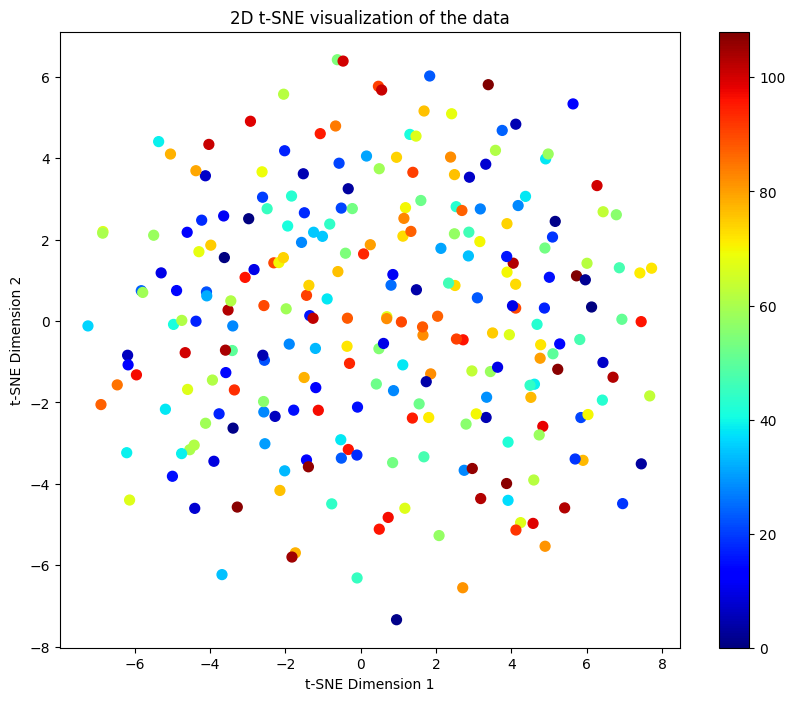

In [9]:
# 可视化
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='jet', s=50)
plt.colorbar(scatter)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D t-SNE visualization of the data')
plt.show()

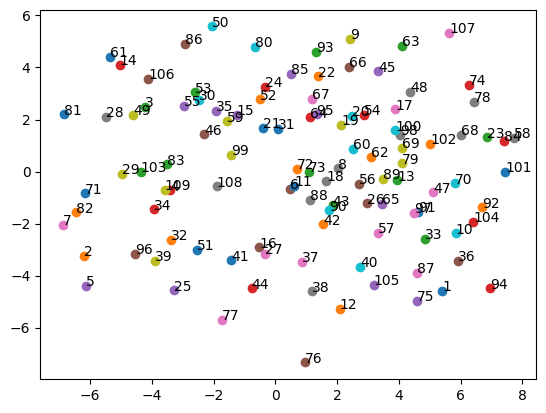

In [10]:
for i, word in enumerate(range(1, 110)):
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1])
    plt.annotate(word, xy=(reduced_data[i, 0], reduced_data[i, 1]))
plt.show()

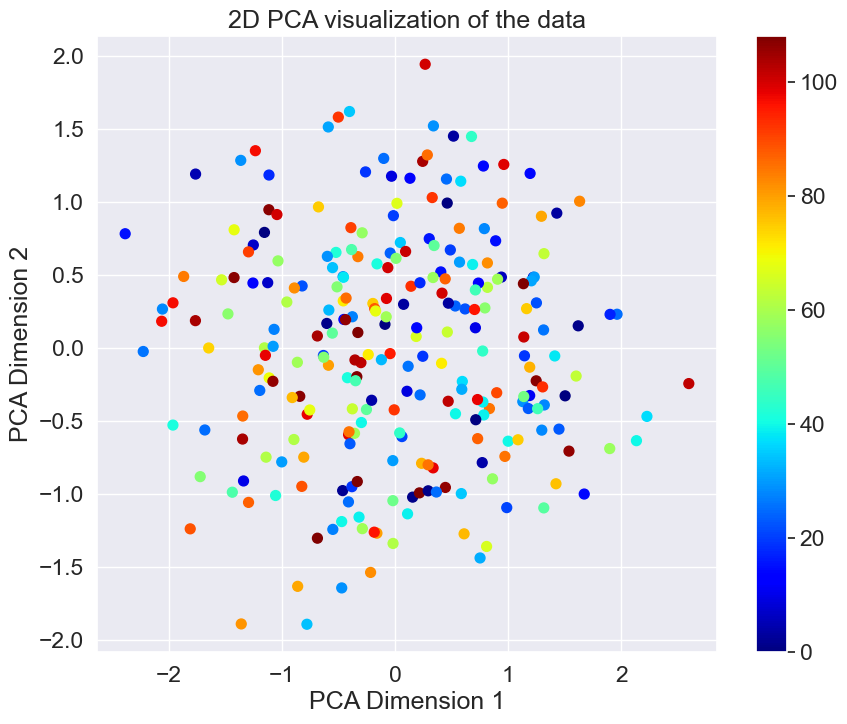

In [62]:
# 使用PCA进行降维
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embedding_weight_np_t)

# 可视化
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='jet', s=50)
plt.colorbar(scatter)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('2D PCA visualization of the data')
plt.show()

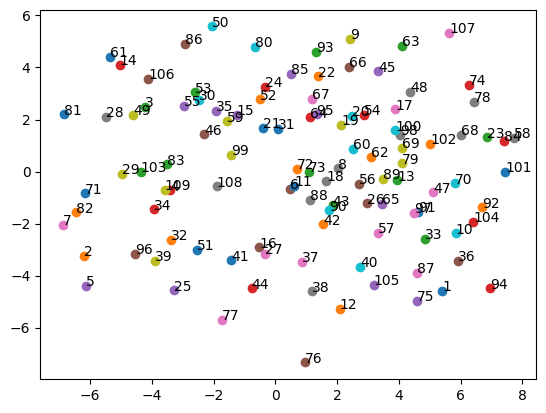

In [11]:
for i, word in enumerate(range(1, 110)):
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1])
    plt.annotate(word, xy=(reduced_data[i, 0], reduced_data[i, 1]))
plt.show()